In [4]:
import os
import pandas as pd
import numpy as np
from sktime.regression.interval_based import TimeSeriesForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
csv_path = os.path.join(notebook_dir, '..', 'clean_data', 'main_df_clean.csv')

In [7]:
merged_df = pd.read_csv(csv_path)
merged_df

,Unnamed: 0,Date,brl Exchange Rate,vnd Exchange Rate,hnl Exchange Rate,idr Exchange Rate,Coffee,Milk,Sugar,Tea,cop Exchange Rate,close
0,0,1990-01,0.000006,5479.329529,2.0000,1804.850000,0.758300,0.041316,0.142000,1.147273,440.08,79.99
1,1,1990-02,0.000010,5479.329529,2.0000,1809.870000,0.840100,0.057037,0.146500,0.958396,451.72,93.79
2,2,1990-03,0.000016,5479.329529,4.0000,1820.350000,0.939600,0.067354,0.153100,0.873620,463.40,92.14
3,3,1990-04,0.000021,5479.329529,4.0000,1826.050000,0.937300,0.067549,0.152400,0.883644,474.62,93.73
4,4,1990-05,0.000023,5563.430866,4.2000,1831.400000,0.920200,0.070450,0.146200,0.848309,485.99,94.05
...,...,...,...,...,...,...,...,...,...,...,...,...
414,414,2024-07,5.541448,24251.560000,24.8582,16261.652826,2.570987,0.242129,0.193517,1.363518,4036.80,229.20
415,415,2024-08,5.552014,24245.850000,24.8826,15793.181818,2.614377,0.244700,0.184195,1.467152,4062.98,244.05
416,416,2024-09,5.540967,24163.540000,24.8381,15341.250000,2.787605,0.251466,0.206248,1.572990,4191.86,270.25
417,417,2024-10,5.623509,24192.520000,24.9661,15541.347826,2.767774,0.238592,0.223552,1.490232,4257.76,245.90


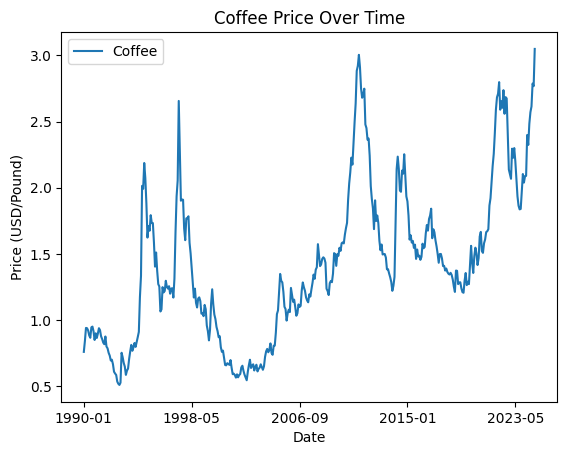

In [8]:
merged_df.plot(x='Date', y='Coffee', title='Coffee Price Over Time')  
plt.xlabel('Date')
plt.ylabel('Price (USD/Pound)')
plt.show()

In [ ]:
target_col = 'Coffee'

X.index = pd.MultiIndex.from_arrays([merged_df.index, merged_df.index], names=["instance", "time"])

X_train, X_test, y_train, y_test = temporal_train_test_split(y, X, test_size=12)

regressor = TimeSeriesForestRegressor(
    n_estimators=100,
    min_interval=3,
    random_state=42
)

regressor.fit(X_train, y_train)

TypeError: No valid mtype could be identified for object of type <class 'list'>. Errors returned are as follows, in format [mtype]: [error message] 
df-list: obj[i] must be Series of mtype pd.DataFrame, not at i=[0]
gluonts_ListDataset_panel: obj must be a listDataset, found <class 'list'>
nested_univ: obj must be of python type pandas.DataFrame, or a subtype thereof, but found <class 'list'>
numpy3D: obj must be of python type numpy.ndarray, or a subtype thereof, but found <class 'list'>
pd-multiindex: obj must be of python type pandas.DataFrame, or a subtype thereof, but found <class 'list'>


In [ ]:
y_pred = regressor.predict(X_test)

TypeError: No valid mtype could be identified for object of type <class 'list'>. Errors returned are as follows, in format [mtype]: [error message] 
df-list: obj[i] must be Series of mtype pd.DataFrame, not at i=[0]
gluonts_ListDataset_panel: obj must be a listDataset, found <class 'list'>
nested_univ: obj must be of python type pandas.DataFrame, or a subtype thereof, but found <class 'list'>
numpy3D: obj must be of python type numpy.ndarray, or a subtype thereof, but found <class 'list'>
pd-multiindex: obj must be of python type pandas.DataFrame, or a subtype thereof, but found <class 'list'>


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.0132504 ,  0.00749461,  0.0089995 ,  0.01279491, -0.02109527,
        0.01402713, -0.00143451,  0.0169514 ,  0.00483641,  0.00035821,
       -0.00176511,  0.00152765, -0.00322629, -0.00057768, -0.00360037,
       -0.00803253, -0.01854024, -0.01204709, -0.01651216,  0.00143469,
       -0.00715348, -0.00862164, -0.00675753, -0.02527761, -0.00247504,
       -0.00682822, -0.00195342,  0.02252926,  0.02256916,  0.03532852,
        0.032719  ,  0.04243542,  0.04720987,  0.05716074,  0.06215201,
        0.04640621,  0.04745259,  0.03397151,  0.05966809,  0.04003015,
        0.00276459, -0.02029499, -0.02833932, -0.04159814, -0.07055147,
       -0.09681058, -0.06174916, -0.09504248, -0.06651356, -0.06531196,
       -0.046734  , -0.03227083, -0.04275048, -0.02760551, -0.02980042,
       -0.03281516, -0.02590592, -0.01709027, -0.01870534, -0.00300554,
       -0.00211769, -0.0099335 , -0.02524032, -0.0060331 ,  0.01224741,
        0.0039695 , -0.03066993,  0.00381741,  0.01081825,  0.02

In [ ]:
def print_metrics(y_true, y_pred):
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.2f}")

print_metrics(y_test, y_pred)

MAE: 0.09
MSE: 0.01
RMSE: 0.11
R²: 0.05


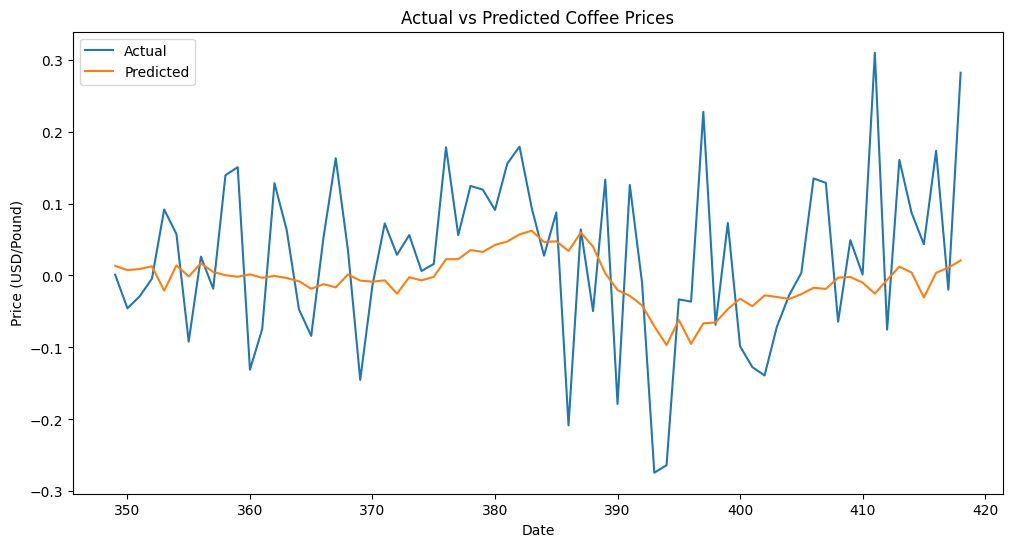

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index[-len(y_test):], y_test, label='Actual')
plt.plot(merged_df.index[-len(y_test):], y_pred, label='Predicted')
plt.title('Actual vs Predicted Coffee Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD/Pound)')
plt.legend()
plt.show()